In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/SVM_question/test_dataset.xlsx'
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head()


,x_1,x_2,y
0,-3.00000,0.0,1
1,3.00000,0.0,-1
2,1.00001,0.5,1
3,1.00002,0.5,1
4,1.00003,0.5,1


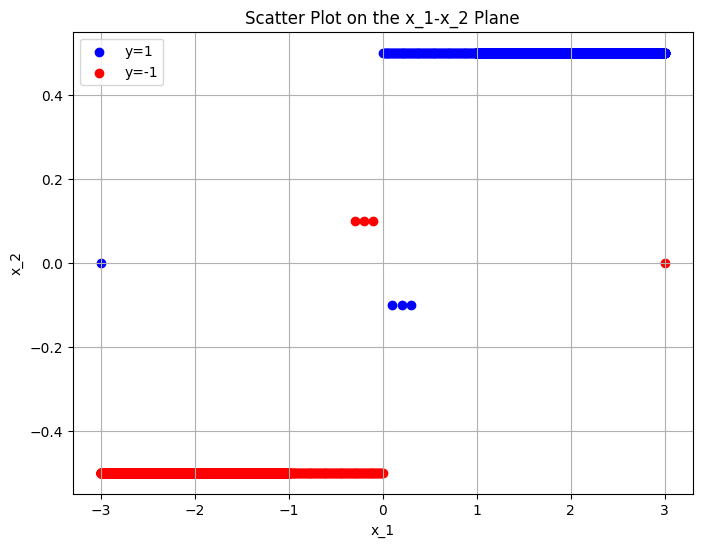

In [2]:
import matplotlib.pyplot as plt

# Separate the dataset based on the label 'y'
class_1 = dataset[dataset['y'] == 1]
class_minus_1 = dataset[dataset['y'] == -1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class_1['x_1'], class_1['x_2'], color='blue', label='y=1')
plt.scatter(class_minus_1['x_1'], class_minus_1['x_2'], color='red', label='y=-1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatter Plot on the x_1-x_2 Plane')
plt.legend()
plt.grid(True)
plt.show()


Empirical Risk under 0-1 Loss: 3.435835767050335e-05


<ipython-input-8-78684d58218b>:54: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[misclassified][:, 0], X[misclassified][:, 1], color='orange', edgecolor='red', label='Misclassified', s=100, marker='x')


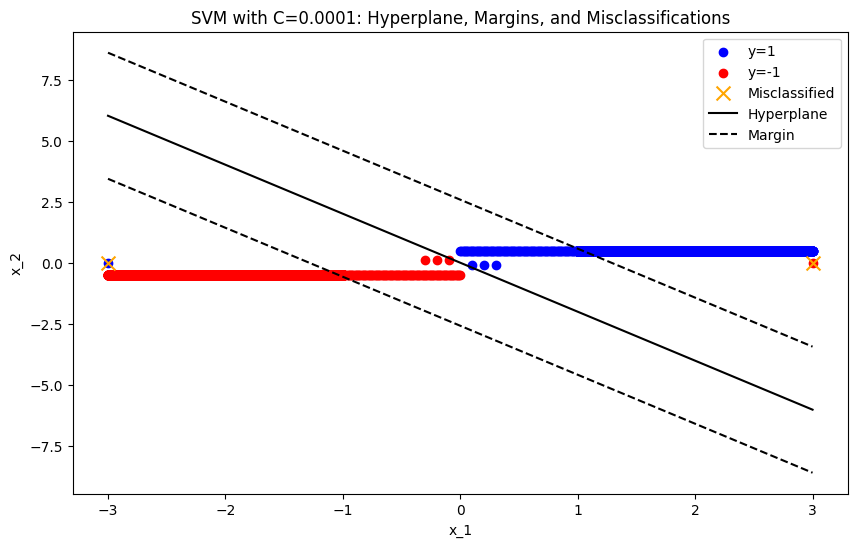

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define the model
model = SVC(C=0.0001, kernel='linear')

# Extract features and labels from the dataset
X = dataset[['x_1', 'x_2']].values
y = dataset['y'].values

# Define the SVM model with C=0.0001
model = SVC(C=0.0001, kernel='linear')

# Fit the model to the data
model.fit(X, y)

### new part:
# Predict labels on the training data
y_pred = model.predict(X)

# Calculate empirical risk under 0-1 loss
empirical_risk = np.mean(y_pred != y)
print(f"Empirical Risk under 0-1 Loss: {empirical_risk}")

# Identify misclassified points
misclassified = y_pred != y
###

# Get the coefficients and intercept from the model
w = model.coef_[0]
b = model.intercept_[0]

# Calculate the slope and intercept for the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Generate x-values for plotting
x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate y-values for the decision boundary
y_plot = slope * x_plot + intercept

# Calculate y-values for the margins
margin_on_y = 1 / w[1]
y_margin_positive = y_plot + margin_on_y
y_margin_negative = y_plot - margin_on_y

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y=1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='y=-1')
# a new line:
plt.scatter(X[misclassified][:, 0], X[misclassified][:, 1], color='orange', edgecolor='red', label='Misclassified', s=100, marker='x')
plt.plot(x_plot, y_plot, 'k-', label='Hyperplane')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('SVM with C=0.0001: Hyperplane, Margins, and Misclassifications')
plt.legend()
plt.show()


In [9]:
# Extracting model parameters
w1, w2 = w
b = model.intercept_[0]

# Formulating the equations
hyperplane_eq = f"{w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f} = 0"
positive_margin_eq = f"{w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f} = 1"
negative_margin_eq = f"{w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f} = -1"

hyperplane_eq, positive_margin_eq, negative_margin_eq


('0.7770 * x_1 + 0.3866 * x_2 + -0.0000 = 0',
 '0.7770 * x_1 + 0.3866 * x_2 + -0.0000 = 1',
 '0.7770 * x_1 + 0.3866 * x_2 + -0.0000 = -1')

Empirical Risk under 0-1 Loss: 0.00010307507301151004


<ipython-input-11-39c226b823ff>:49: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[misclassified_C1][:, 0], X[misclassified_C1][:, 1], color='orange', edgecolor='red', label='Misclassified', s=100, marker='x')


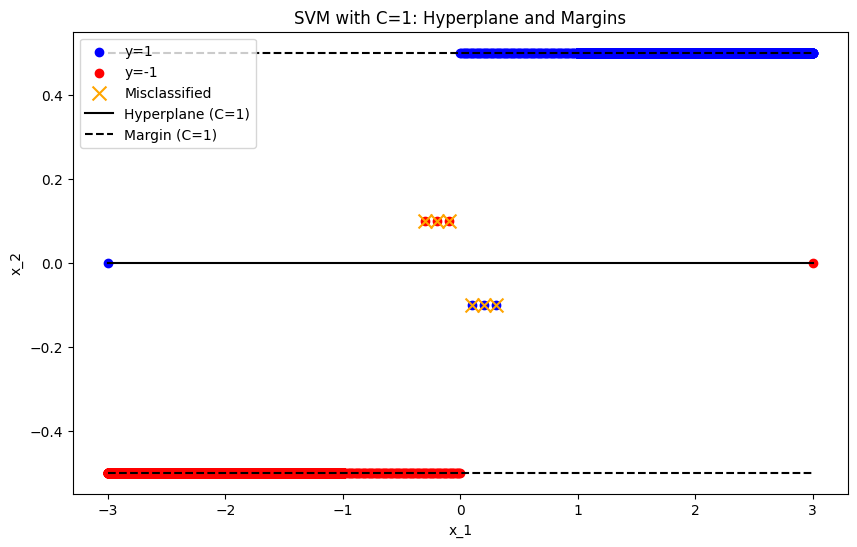

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Assuming 'X' and 'y' are your feature matrix and target vector respectively, as loaded previously

# Define the SVM model with C=1
model_C1 = SVC(C=1, kernel='linear')

# Fit the model to the data
model_C1.fit(X, y)

### new part:
# Predict labels on the training data
y_pred_C1 = model_C1.predict(X)

# Calculate empirical risk under 0-1 loss
empirical_risk_C1 = np.mean(y_pred_C1 != y)
print(f"Empirical Risk under 0-1 Loss: {empirical_risk_C1}")

# Identify misclassified points
misclassified_C1 = y_pred_C1 != y
###

# Get the coefficients and intercept from the model
w_C1 = model_C1.coef_[0]
b_C1 = model_C1.intercept_[0]

# Calculate the slope and intercept for the decision boundary
slope_C1 = -w_C1[0] / w_C1[1]
intercept_C1 = -b_C1 / w_C1[1]

# Generate x-values for plotting
x_plot_C1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate y-values for the decision boundary
y_plot_C1 = slope_C1 * x_plot_C1 + intercept_C1

# Calculate y-values for the margins
margin_C1_on_y = 1 / w_C1[1]
y_margin_positive_C1 = y_plot_C1 + margin_C1_on_y
y_margin_negative_C1 = y_plot_C1 - margin_C1_on_y

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y=1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='y=-1')
# a new line:
plt.scatter(X[misclassified_C1][:, 0], X[misclassified_C1][:, 1], color='orange', edgecolor='red', label='Misclassified', s=100, marker='x')
plt.plot(x_plot_C1, y_plot_C1, 'k-', label='Hyperplane (C=1)')
plt.plot(x_plot_C1, y_margin_positive_C1, 'k--', label='Margin (C=1)')
plt.plot(x_plot_C1, y_margin_negative_C1, 'k--')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('SVM with C=1: Hyperplane and Margins')
plt.legend()
plt.show()


In [12]:
# Extracting model parameters for C=1
w1_C1, w2_C1 = w_C1
b_C1 = model_C1.intercept_[0]

# Formulating the equations for C=1
hyperplane_eq_C1 = f"{w1_C1:.4f} * x_1 + {w2_C1:.4f} * x_2 + {b_C1:.4f} = 0"
positive_margin_eq_C1 = f"{w1_C1:.4f} * x_1 + {w2_C1:.4f} * x_2 + {b_C1:.4f} = 1"
negative_margin_eq_C1 = f"{w1_C1:.4f} * x_1 + {w2_C1:.4f} * x_2 + {b_C1:.4f} = -1"

hyperplane_eq_C1, positive_margin_eq_C1, negative_margin_eq_C1


('-0.0000 * x_1 + 2.0000 * x_2 + 0.0000 = 0',
 '-0.0000 * x_1 + 2.0000 * x_2 + 0.0000 = 1',
 '-0.0000 * x_1 + 2.0000 * x_2 + 0.0000 = -1')